In [1]:
import matplotlib.pyplot as plt
from gym_anytrading.envs import StocksEnv
from finta import TA
import random
import tensorflow as tf
import pandas as pd
import yfinance as yf
import numpy as np

random.seed(42)
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

2024-04-15 01:17:55.987950: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 01:17:57.489866: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tickers_negro = [
    ("NVDA", "2012-01-01", "2023-12-31"),
    ("INTC", "2012-01-01", "2023-12-31"),
    ("FRT", "2012-01-01", "2023-12-31"),
    ("NKE", "2012-01-01", "2023-12-31"),
    ("TSM", "2012-01-01", "2023-12-31"),
    ("USB", "2012-01-01", "2023-12-31"),
    ("XOM", "2012-01-01", "2023-12-31"),
    ("BA", "2012-01-01", "2023-12-31"),
    ("NEM", "2012-01-01", "2023-12-31"),
    ("HBAN", "2012-01-01", "2023-12-31"),

    ("VZ", "2012-01-01", "2023-12-31"),
    ("PCG", "2012-01-01", "2023-12-31"),
    ("FCX", "2012-01-01", "2023-12-31"),
    ("C", "2012-01-01", "2023-12-31"),
    ("OXY", "2012-01-01", "2023-12-31"),
    ("KEY", "2012-01-01", "2023-12-31"),
    ("WFC", "2012-01-01", "2023-12-31"),
    ("MRO", "2012-01-01", "2023-12-31"),
    ("GOOGL", "2012-01-01", "2023-12-31"),
    ("NFLX", "2012-01-01", "2023-12-31"),

    ("HDB", "2012-01-01", "2023-12-31"),
    ("MU", "2012-01-01", "2023-12-31"),
    ("AVY", "2012-01-01", "2023-12-31"),
    ("MET", "2012-01-01", "2023-12-31"),
    ("MSTR", "2012-01-01", "2023-12-31"),
    ("WMB", "2012-01-01", "2023-12-31"),
    ("BSX", "2012-01-01", "2023-12-31"),
    ("EBAY", "2012-01-01", "2023-12-31"),
    ("SO", "2012-01-01", "2023-12-31"),
    ("CTSH", "2012-01-01", "2023-12-31"),

    ("BBWI", "2012-01-01", "2023-12-31"),
    ("V", "2012-01-01", "2023-12-31"),
    ("VFC", "2012-01-01", "2023-12-31"),
    ("MOS", "2012-01-01", "2023-12-31"),
    ("CRM", "2012-01-01", "2023-12-31"),
    ("SCHW", "2012-01-01", "2023-12-31"),
    ("CNP", "2012-01-01", "2023-12-31"),
    ("MDT", "2012-01-01", "2023-12-31"),
    ("EXC", "2012-01-01", "2023-12-31"),
    ("MTCH", "2012-01-01", "2023-12-31"),

    ("PARA", "2012-01-01", "2023-12-31"),
    ("UAL", "2012-01-01", "2023-12-31"),
    ("JNJ", "2012-01-01", "2023-12-31"),
    ("LUV", "2012-01-01", "2023-12-31"),
    ("MCD", "2012-01-01", "2023-12-31"),
    ("JPM", "2012-01-01", "2023-12-31"),
    ("GILD", "2012-01-01", "2023-12-31"),
    ("CVS", "2012-01-01", "2023-12-31"),
    ("ORCL", "2012-01-01", "2023-12-31"),
    ("UHS", "2012-01-01", "2023-12-31")
]

RSI

In [3]:


datas = {}

for k,i in enumerate(tickers_negro): 
    datas[i[0]] = yf.download(i[0], start=i[1], end= i[2],interval="1d")

    # prices = np.array(data['Adj Close'].values) #Adj Close prices
    dates = np.array(datas[i[0]].index.values).astype('datetime64[ns]') #Dates
    datas[i[0]]['rsi'] = TA.RSI(datas[i[0]],14,column='adj close') #Relative Strength Index (RSI)
    datas[i[0]]['macd'] = TA.MACD(datas[i[0]],column='adj close')['MACD'] #MACD Line
    datas[i[0]]['macd_signal'] = TA.MACD(datas[i[0]], column='adj close')['SIGNAL'] #MACD Signal Line
    # datas[i[0]]['bb_bbm'] = TA.BBANDS(datas[i[0]], column='adj close')['BB_MIDDLE'] #Bollinger Bands (BB) middle band (BBM)
    datas[i[0]]['bb_bbu'] = TA.BBANDS(datas[i[0]], column='adj close')['BB_UPPER'] #Bollinger Bands (BB) upper band (BBU)
    datas[i[0]]['bb_bbl'] = TA.BBANDS(datas[i[0]],column='adj close')['BB_LOWER'] #Bollinger Bands (BB) lower band (BBL)
    # datas[i[0]]['bb_width'] = TA.BBWIDTH(datas[i[0]],column='adj close') #Bollinger Bands (BB) width
    datas[i[0]]['obv'] = TA.OBV(datas[i[0]],'adj close') #On Balance Volume (OBV)
    # datas[i[0]]['from'] = pd.DataFrame([k] * len(datas[i[0]]))
    
    datas[i[0]].fillna(0, inplace=True)
    datas[i[0]] = datas[i[0]][datas[i[0]].index > '2013-01-01']
    datas[i[0]]
    
df= pd.concat([df for df in datas.values()], axis=0)
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Open,High,Low,Close,Adj Close,Volume,rsi,macd,macd_signal,bb_bbu,bb_bbl,obv,from
Date,,,,,,,,,,,,,
2013-01-02,3.140000,3.182500,3.127500,3.180000,2.935840,47883600,60.223811,0.011304,0.011125,3.206539,2.971461,-390527600.0,0.0
2013-01-03,3.180000,3.217500,3.145000,3.182500,2.938148,29888800,60.423354,0.017204,0.012340,3.216986,2.976764,-360638800.0,0.0
2013-01-04,3.187500,3.297500,3.177500,3.287500,3.035087,52496800,67.742597,0.029362,0.015745,3.246299,2.977201,-308142000.0,0.0
2013-01-07,3.285000,3.295000,3.170000,3.192500,2.947381,61073200,57.399520,0.031557,0.018907,3.249990,2.993260,-369215200.0,0.0
2013-01-08,3.200000,3.210000,3.100000,3.122500,2.882756,46642400,51.196690,0.027762,0.020678,3.243191,3.013309,-415857600.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,151.500000,153.570007,151.250000,153.080002,152.890701,382700,71.002013,5.003540,4.321617,156.466951,129.343047,71061900.0,0.0
2023-12-26,153.279999,155.179993,152.630005,154.130005,153.939407,288000,72.122511,5.169724,4.491238,157.901990,129.598008,71349900.0,0.0
2023-12-27,153.929993,153.949997,151.699997,152.610001,152.421280,374400,68.024727,5.119908,4.616972,158.752434,130.400564,70975500.0,0.0


In [60]:
data = yf.download('GOOG', start='2012-01-01', end='2023-12-31' ,interval="1d")
prices = np.array(data['Adj Close'].values) #Adj Close prices


dates = np.array(data.index.values).astype('datetime64[ns]') #Dates
data['rsi'] = TA.RSI(data,14,column='adj close') #Relative Strength Index (RSI)
data['macd'] = TA.MACD(data,column='adj close')['MACD'] #MACD Line
data['macd_signal'] = TA.MACD(data, column='adj close')['SIGNAL'] #MACD Signal Line
# data['bb_bbm'] = TA.BBANDS(data, column='adj close')['BB_MIDDLE'] #Bollinger Bands (BB) middle band (BBM)
data['bb_bbu'] = TA.BBANDS(data, column='adj close')['BB_UPPER'] #Bollinger Bands (BB) upper band (BBU)
data['bb_bbl'] = TA.BBANDS(data,column='adj close')['BB_LOWER'] #Bollinger Bands (BB) lower band (BBL)
# data['bb_width'] = TA.BBWIDTH(data,column='adj close') #Bollinger Bands (BB) width
data['obv'] = TA.OBV(data,'adj close') #On Balance Volume (OBV)

data.fillna(0, inplace=True)
data = data[data.index > '2013-01-01']
len(data)



[*********************100%%**********************]  1 of 1 completed


2768

## Enviroment

In [9]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Adj Close'].to_numpy()[start:end]
    signal_features = env.df.loc[:,['Adj Close','rsi','Volume','macd','macd_signal','bb_bbu','bb_bbl','obv']].to_numpy()[start:end]
    return prices, signal_features

# def reward_function(env,action):
#     pass


In [10]:
class customEnv(StocksEnv):
    """
    Custom Environment for RL trading
    """
    _process_data = add_signals    

    # _calculate_reward = reward_function
    

train

In [33]:
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor

env = customEnv(df=data, window_size=10, frame_bound=(10, len(data)))
env.trade_fee_ask_percent = 0
env.trade_fee_bid_percent = 0
env.reset(seed=42)
env = Monitor(env, './logs')  # Envolver con Monitor wrapper
env_maker = lambda: env
env_train = DummyVecEnv([env_maker])
#add dqn
model = A2C('MlpPolicy', env_train, verbose=1)

eval_callback = EvalCallback(env_train, best_model_save_path='./logs/',
                             log_path='./logs/', eval_freq=500,
                             deterministic=True, render=False)

model.learn(total_timesteps=100000,callback=eval_callback)

Using cuda device
Eval num_timesteps=500, episode_reward=-2.47 +/- 0.00
Episode length: 2757.00 +/- 0.00
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 2.76e+03  |
|    mean_reward        | -2.47     |
| time/                 |           |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.684    |
|    explained_variance | -1.58e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -0.0209   |
|    value_loss         | 0.00358   |
-------------------------------------
New best mean reward!
----------------------------
| time/              |     |
|    fps             | 50  |
|    iterations      | 100 |
|    time_elapsed    | 9   |
|    total_timesteps | 500 |
----------------------------
Eval num_timesteps=1000, episode_reward=4.91 +/- 0.00
Episode length: 2757.00 +/- 0.00
------------------------------------
| eval/       

In [39]:
model.save('RL_del_gran_pisky_model_callback.h5')

Evaluation

In [40]:
#load model
from stable_baselines3 import A2C
model = A2C.load('RL_del_gran_pisky_model_callback.h5')

In [67]:

data = yf.download('NKE', start='2012-01-01', end= '2024-01-01',interval="1d")
prices = np.array(data['Adj Close'].values) #Adj Close prices
dates = np.array(data.index.values).astype('datetime64[ns]') #Dates
data['rsi'] = TA.RSI(data,14,column='adj close') #Relative Strength Index (RSI)
data['macd'] = TA.MACD(data,column='adj close')['MACD'] #MACD Line
data['macd_signal'] = TA.MACD(data, column='adj close')['SIGNAL'] #MACD Signal Line
# data['bb_bbm'] = TA.BBANDS(data, column='adj close')['BB_MIDDLE'] #Bollinger Bands (BB) middle band (BBM)
data['bb_bbu'] = TA.BBANDS(data, column='adj close')['BB_UPPER'] #Bollinger Bands (BB) upper band (BBU)
data['bb_bbl'] = TA.BBANDS(data,column='adj close')['BB_LOWER'] #Bollinger Bands (BB) lower band (BBL)
# data['bb_width'] = TA.BBWIDTH(data,column='adj close') #Bollinger Bands (BB) width
data['obv'] = TA.OBV(data,'adj close') #On Balance Volume (OBV)

data.fillna(0, inplace=True)
data = data[data.index > '2013-01-01']
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,rsi,macd,macd_signal,bb_bbu,bb_bbl,obv
Date,,,,,,,,,,,,
2013-01-02,26.200001,26.240000,25.700001,25.920000,22.821421,7512800,62.141607,0.438271,0.378947,26.297056,23.770944,-8987000.0
2013-01-03,25.975000,26.299999,25.889999,26.184999,23.054739,7232200,64.435317,0.457652,0.394688,26.427891,23.816859,-1754800.0
2013-01-04,26.250000,26.520000,26.235001,26.440001,23.279261,6794000,66.536399,0.485532,0.412857,26.582832,23.863918,5039200.0
2013-01-07,26.395000,26.540001,26.264999,26.480000,23.314474,6489400,66.867012,0.504651,0.431216,26.736540,23.897710,11528600.0
2013-01-08,26.360001,26.469999,26.094999,26.200001,23.067947,6714200,62.231503,0.494213,0.443815,26.826219,23.963281,4814400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,108.260002,110.800003,107.449997,108.040001,107.655373,46642900,38.127686,2.977695,3.754972,126.709398,105.889603,480664100.0
2023-12-26,108.300003,108.690002,107.480003,108.019997,107.635437,12846700,38.099763,1.985707,3.401119,126.640695,105.964306,467817400.0
2023-12-27,108.339996,108.589996,106.849998,107.129997,106.748604,10157900,36.808365,1.115134,2.943922,126.772160,105.670840,457659500.0


In [69]:
from gym_anytrading.envs import Actions

env_test = customEnv(df=data, window_size=10, frame_bound=(10,len(data)))

obs,_ = env_test.reset(seed=42)
env_test.trade_fee_ask_percent = 0
env_test.trade_fee_bid_percent = 0

r= []
action_stats = {Actions.Sell: 0, Actions.Buy: 0}
buy_rsi = []
sell_rsi = []
lt=0
while True:
    actual_lt= env_test._last_trade_tick
    obs = obs[np.newaxis, ...] 
    action, _states = model.predict(obs)
    # print(env_test._last_trade_tick)
    # break
    # print('skipped',action)
    if lt!=actual_lt:
        # print(action,"Last trade tick:",actual_lt)
        lt=actual_lt
        
        # print(action)
    action_stats[Actions(action)] += 1
    if action == 0:
        # print("Sell")
        # sell_rsi.append()
        # sell_rsi.append(env_test.signal_features[env_test._last_trade_tick][0])
        pass

        pass
    elif action == 1:
        # print("Buy")
        # buy_rsi.append(env_test.signal_features[env_test._last_trade_tick][0])
        pass
    else:
        print('??')        
    obs, rewards,_ , done, info= env_test.step(action)

    
    r.append(rewards)
    if done:
        print("info",info)
        break

info {'total_reward': 28.1407413482666, 'total_profit': 1.7757067315852784, 'position': <Positions.Long: 1>}


In [70]:
env_test.max_possible_profit()

25746183.217944276

OPTUNA

In [52]:
env_test.signal_features[env_test._current_tick] #obtener los valores del dia que se va a predecir

array([8.96185608e+01, 7.13673794e+01, 2.88762200e+06, 2.63181893e+00,
       2.56088640e+00, 9.23030974e+01, 8.34402139e+01, 1.49329941e+08])

In [73]:
print("env information:")
print("> shape:", env_test.unwrapped.shape)
print("> df.shape:", env_test.unwrapped.df.shape)
print("> prices.shape:", env_test.unwrapped.prices.shape)
print("> signal_features.shape:", env_test.unwrapped.signal_features.shape)
print("> max_possible_profit:", env_test.unwrapped.max_possible_profit())


env information:
> shape: (10, 8)
> df.shape: (2768, 12)
> prices.shape: (2768,)
> signal_features.shape: (2768, 8)
> max_possible_profit: 25746183.217944276


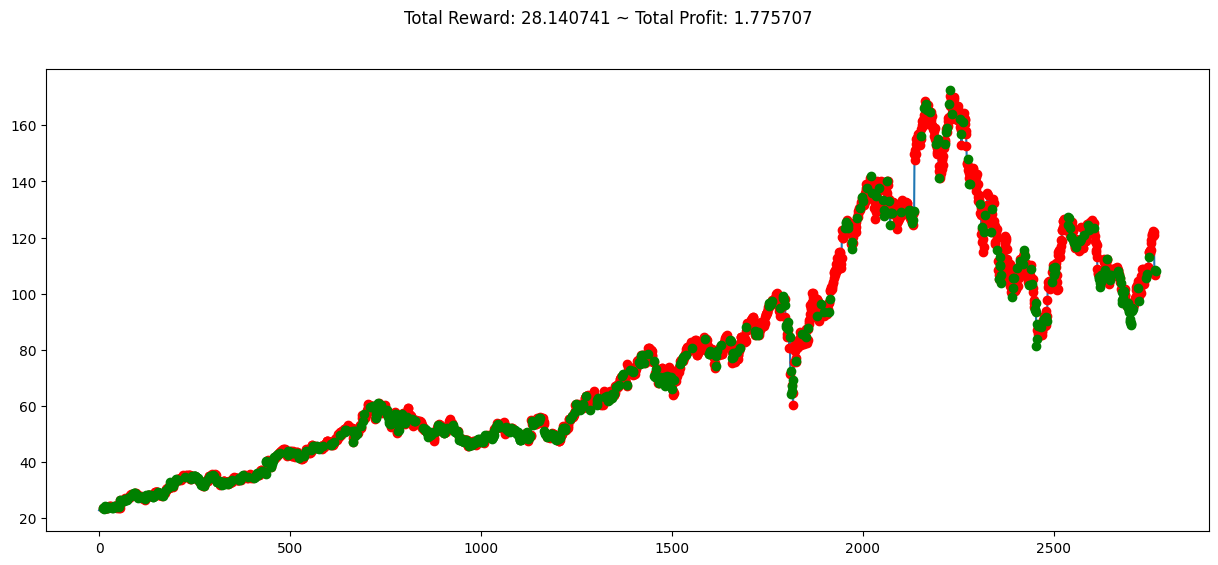

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.cla()
env_test.render_all()
plt.show()

## ELSE

In [74]:
env_test.step([2])

(array([[1.20708733e+02, 7.71849239e+01, 6.87480000e+06, 4.23269108e+00,
         3.67541744e+00, 1.25104950e+02, 1.02873050e+02, 5.12253000e+08],
        [1.22203392e+02, 7.93182589e+01, 7.69730000e+06, 4.31013391e+00,
         3.80236073e+00, 1.25933788e+02, 1.03676213e+02, 5.19950300e+08],
        [1.20997704e+02, 7.33593066e+01, 9.17660000e+06, 4.22550989e+00,
         3.88699057e+00, 1.26314896e+02, 1.04783105e+02, 5.10773700e+08],
        [1.22093781e+02, 7.51845059e+01, 1.65333000e+07, 4.19849140e+00,
         3.94929073e+00, 1.26819234e+02, 1.05739766e+02, 5.27307000e+08],
        [1.07655373e+02, 3.81276857e+01, 4.66429000e+07, 2.97769518e+00,
         3.75497162e+00, 1.26709398e+02, 1.05889603e+02, 4.80664100e+08],
        [1.07635437e+02, 3.80997630e+01, 1.28467000e+07, 1.98570675e+00,
         3.40111865e+00, 1.26640695e+02, 1.05964306e+02, 4.67817400e+08],
        [1.06748604e+02, 3.68083649e+01, 1.01579000e+07, 1.11513418e+00,
         2.94392175e+00, 1.26772160e+02, 1.05